In [180]:
CHROMATIN_REGIONS = ['Promoter', 'Enhancer', 'Bivalent', 'Transcribed', 'RepressedPC', 'ZNF', 'Heterochromatin', 'Quiescent']

In [181]:
import numpy as np
import collections
import json

import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib
import sys
sys.path.append('../')
from utils import utils
from utils import mpl_stylesheet
mpl_stylesheet.banskt_presentation(fontfamily = 'latex-clearsans', fontsize = 22, colors = 'banskt', dpi = 72)

In [210]:
import pandas as pd
resfile = "../cre_enrichment/roadmap_maf05/all_tissue_cre_02.txt"
tissue_file = "../tissue_table.txt"
json_file = "../external/gtex_metadata.json"
nsample_file = "../tissue_nsamples.txt"
datadf = pd.read_table(resfile, index_col=0)

In [204]:
# datadf = datadf[datadf['NTRANS'] > 50]

In [211]:
tshorts, tfulls = utils.read_tissues(tissue_file)
with open(json_file) as instream:
    gtex_meta = json.load(instream)
tissue_colors = dict()
tissue_names = dict()
for tshort, tfull in zip(tshorts, tfulls):
    tissue_names[tshort] = tfull
    tissue_colors[tshort] = "#" + gtex_meta[tfull.replace(" ", "_")]["colorHex"]
    
tissue_nsamples = dict()
with open(nsample_file, 'r') as instream:
    for line in instream:
        tshort = line.strip().split()[0].strip()
        tissue_nsamples[tshort] = int(line.strip().split()[1].strip())

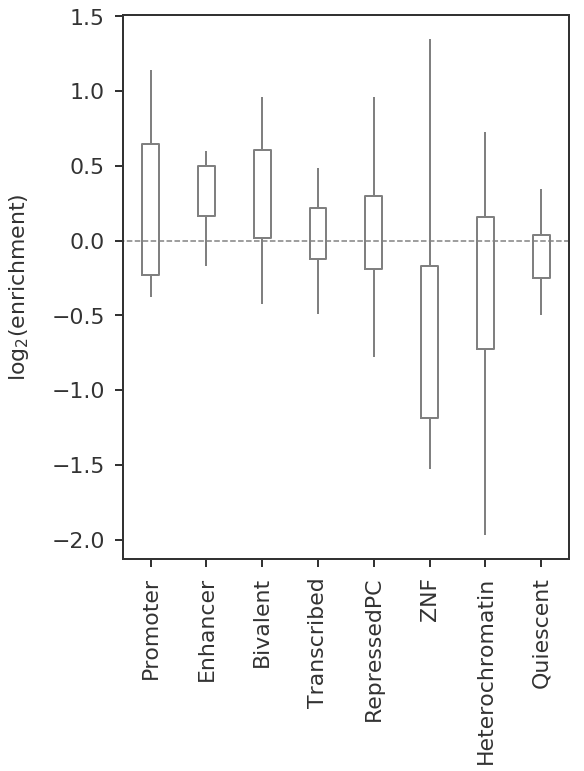

In [212]:
fig = plt.figure(figsize = (8, 10))
ax1 = fig.add_subplot(111)

#mcolors = [tissue_colors[x] for x in list(datadf.index)]
size_levels = [10, 50, 100, 200]
jitter_width = 0.2
xjit = - jitter_width + np.random.rand(datadf.shape[0]) * jitter_width * 2.0

def get_size(p):
    if p <= 0.001:
        size = size_levels[3]
    elif p <= 0.01:
        size = size_levels[2]
    elif p <= 0.05:
        size = size_levels[1]
    else:
        size = size_levels[0]
    return size
    

datalist = list()
for i, cre in enumerate(CHROMATIN_REGIONS):
    xmid = i + 1
    enrichstring = f'{CHROMATIN_REGIONS[i].upper()}_ENRICH'
    pvalstring = f'{CHROMATIN_REGIONS[i].upper()}_PVAL'
    enrich = np.array(datadf[enrichstring])
    nzidx = enrich > 0
    yvals = np.log2(enrich[nzidx])
    xvals = np.repeat(xmid, datadf.shape[0]) - xjit
    xvals = xvals[nzidx]
    pvals = np.array(datadf[pvalstring])[nzidx]
    
    #xvals = xvals[pvals <= 0.05]
    #yvals = yvals[pvals <= 0.05]
    datalist.append(yvals)
    #msize = 1 + -np.log10(np.array(datadf[pvalstring])[nzidx]) * size_multiplier
    mcolors = [tissue_colors[x] for j, x in enumerate(list(datadf.index)) if nzidx[j]]
    #mcolors = [mcolors[j] for j, x in enumerate(pvals) if x <= 0.05]
    msize = [get_size(x) for j, x in enumerate(datadf[pvalstring]) if nzidx[j]]
    #msize = [msize[j] for j, x in enumerate(pvals) if x <= 0.05]
    #ax1.scatter(xvals[nzidx], yvals, facecolor = mcolors, s = msize, alpha=1.0, zorder = 20, linewidths=2, edgecolors=mcolors)
    #if xvals.shape[0] > 0:
        #print(xvals)
        #ax1.scatter(xvals, yvals, facecolor = mcolors, s = msize, alpha=1.0, zorder = 20)
    


medianprops = dict(linewidth=0)
boxprops = dict(linewidth=2, color='gray')
bplot = ax1.boxplot(datalist, showfliers=False, zorder = 10, widths = 0.3, vert = True, showcaps = False,
                    boxprops = boxprops, medianprops = medianprops, whiskerprops = boxprops)
# for patch in bplot['boxes']:
#     patch.set_facecolor('gray')
#     patch.set_alpha(0.2)
    
    
xmax = len(CHROMATIN_REGIONS) + 1
ybase = np.log2(1.0)
ax1.plot([0, xmax], [ybase, ybase], ls = 'dashed', color = 'gray')
ax1.set_xticks([i + 1 for i, cre in enumerate(CHROMATIN_REGIONS)])
ax1.set_xticklabels(CHROMATIN_REGIONS, rotation='vertical')
ax1.set_ylabel(r"$\log_{2}$(enrichment)")
#ax1.set_ylim([-0.69, 0.4])
#ax1.set_ylim([0, 2.5])

plt.show()

In [214]:
datadf

,NTRANS,PROMOTER_ENRICH,PROMOTER_PVAL,ENHANCER_ENRICH,ENHANCER_PVAL,TRANSCRIBED_ENRICH,TRANSCRIBED_PVAL,ZNF_ENRICH,ZNF_PVAL,HETEROCHROMATIN_ENRICH,HETEROCHROMATIN_PVAL,BIVALENT_ENRICH,BIVALENT_PVAL,REPRESSEDPC_ENRICH,REPRESSEDPC_PVAL,QUIESCENT_ENRICH,QUIESCENT_PVAL
TISSUE,,,,,,,,,,,,,,,,,
as,1646,0.849069,0.6903,1.151787,0.1638,1.119518,0.0390,0.347983,0.9111,0.584024,0.9920,0.967200,0.5245,0.889468,0.5684,1.027264,0.7063
av,514,2.193193,0.0010,1.373137,0.0340,1.391706,0.0010,0.425776,0.8462,0.612500,0.9820,1.577894,0.1598,1.183987,0.0020,0.763260,1.0000
aa,3999,1.109672,0.1718,1.411420,0.0060,1.083473,0.0010,0.965469,0.2997,0.958488,0.5055,0.982176,0.2647,1.215817,0.0010,0.924532,1.0000
ban,2842,0.773002,0.9001,0.967029,0.4655,0.985492,0.2128,0.952653,0.4486,0.753668,0.9211,0.748806,0.7512,0.931830,0.3886,1.040787,0.4905
bhi,295,1.521925,0.2168,1.318479,0.1618,0.957361,0.5375,2.539141,0.2657,1.644513,0.1548,1.373119,0.4755,1.176542,0.0849,0.890648,0.9940
br,812,0.338835,0.9950,1.451964,0.0010,0.917165,0.7712,0.655334,0.5654,0.857585,0.8511,1.938564,0.0290,1.112517,0.0070,0.974915,0.9810
ebv,396,0.854505,0.5524,0.893036,0.4955,0.917124,0.5884,0.410993,0.7003,0.835188,0.5794,0.000000,1.0000,0.877303,0.8681,1.082211,0.0430
cols,55,0.000000,1.0000,4.691477,0.0010,2.521323,0.0010,0.000000,1.0000,0.000000,1.0000,0.000000,1.0000,0.527769,0.9431,0.520443,0.9990
colt,2310,1.514780,0.0020,1.402711,0.0010,1.264992,0.0010,0.697338,0.5714,1.089157,0.1918,1.108123,0.2867,1.228928,0.0010,0.892683,1.0000


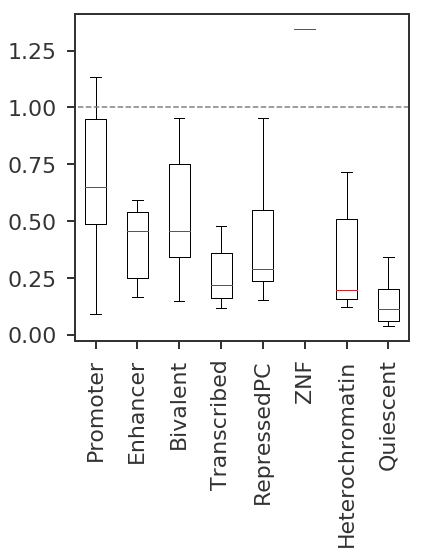

In [213]:
fig = plt.figure(figsize = (6, 6))
ax1 = fig.add_subplot(111)
X_nonan = [x[~np.isnan(x)] for x in datalist]
X_nonan_nozero = [x[x > 0] for x in X_nonan]
ax1.boxplot(X_nonan_nozero, showfliers=False)
ax1.set_xticklabels(CHROMATIN_REGIONS, rotation='vertical')
xmax = len(CHROMATIN_REGIONS) + 1
ax1.plot([0, xmax], [1., 1.], ls = 'dashed', color = 'gray')

#outfile = f'../plots/tissue_specific_cis_regulatory_elements.png'
#plt.savefig(outfile, bbox_inches='tight')
plt.show()